In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Postures.csv").drop(0)

In [3]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,-52.919272,85.2322638852917,67.7492195028673,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,-69.982489,87.4508729469625,68.4008083028339,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,-70.658489,86.8353875680762,68.9079249764243,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,-72.228461,61.5961571288978,11.2506481750465,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,-72.574743,86.3687480605765,67.9012603746826,-72.4446499648169,61.2754021959714,10.8411094568665,-69.2799064015993,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?


In [4]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000
mean,2.983776,7.959229,50.346308,85.813150,-29.985096,49.595844,86.193751,-29.509579,48.612744,83.772387,-30.560906
std,1.421152,4.697754,32.695886,40.203448,34.361971,32.477961,40.452297,34.764460,33.605155,41.022710,35.120384
min,1.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296
25%,2.000000,5.000000,29.295141,63.497746,-56.356593,28.755679,64.156450,-57.360408,25.173405,58.053733,-58.654339
50%,3.000000,9.000000,54.620245,86.526334,-30.864248,54.215714,87.543493,-30.185331,53.814592,86.459935,-32.356535
75%,4.000000,12.000000,72.488833,113.108673,-1.419462,71.763080,116.228881,-0.368080,71.561988,106.661720,-0.946134
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


In [5]:
df = df.replace('?', np.nan)

In [6]:
df = df.astype('float')

In [7]:
dfAux = df.drop(columns = ['X5','Y5','Z5','X6','Y6','Z6','X7','Y7','Z7','X8','Y8','Z8','X9','Y9','Z9','X10','Y10','Z10','X11','Y11','Z11','User'])

In [8]:
dfAux = dfAux.dropna()

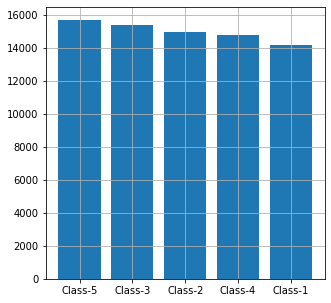

In [9]:
#Class distribution 
plt.figure(figsize=(5, 5))
plt.grid()
plt.bar(["Class-" + str(int(classe)) for classe in dfAux.value_counts('Class').index], dfAux.value_counts('Class').values);

In [10]:
df1 = dfAux.loc[dfAux['Class'] == 1].sample(frac = 1)
df2 = dfAux.loc[dfAux['Class'] == 2].sample(frac = 1)
df3 = dfAux.loc[dfAux['Class'] == 3].sample(frac = 1)
df4 = dfAux.loc[dfAux['Class'] == 4].sample(frac = 1)
df5 = dfAux.loc[dfAux['Class'] == 5].sample(frac = 1)

In [11]:
df1Train = df1.head(11280)
df2Train = df2.head(11280)
df3Train = df3.head(11280)
df4Train = df4.head(11280)
df5Train = df5.head(11280)

df1Test = df1.tail(2820)
df2Test = df2.tail(2820)
df3Test = df3.tail(2820)
df4Test = df4.tail(2820)
df5Test = df5.tail(2820)

In [12]:
dfTrain = pd.concat([df1Train,df2Train,df3Train,df4Train,df5Train]).sample(frac = 1)
dfTeste = pd.concat([df1Test,df2Test,df3Test,df4Test,df5Test]).sample(frac = 1)

In [13]:
x_train = dfTrain.drop(columns = 'Class')
y_train = dfTrain['Class']

Normalizacao Z-Score

In [14]:
x_mean = x_train.mean()
x_std = x_train.std()
x_normZ = (x_train-x_mean)/x_std

Conjunto de Teste

In [15]:
x_test = dfTeste.drop(columns = 'Class')
y_test = dfTeste['Class']

Z-Score

In [16]:
x_testZ = (x_test-x_mean)/x_std

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix, accuracy_score

Aplicações dos algoritmos foram testados com dados só normalizados  e dados normalizados + PCA. Só normalizados por Z-Score gerou melhor resultado

In [18]:
svm = SVC(C= 9,
          kernel='rbf',            # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’       
          gamma='auto' ,           # se gamma='scale'(padrão) é passado, então ele usa 1 / (n_features * X.var ()) como valor de gama,
                                   # se 'auto', usa 1 / n_features.
          degree = 4,              # grau do polinomio para kernel poly
          coef0 = 2,               # usa em poly e sigmoid
          tol=0.01,                # Tolerância para critério de parada.
          shrinking = True,        # uso da heurística de encolhimento
          probability = False,      # usa 5-fold cross validation
          cache_size=2048,         # Especifique o tamanho do cache do kernel (em MB).
          verbose= False, 
          max_iter=-1,             # Limite rígido nas iterações no solver ou -1 para nenhum limite.
          )

svm.fit(x_normZ, y_train.values.ravel())

print("Treino\n")
predictions = svm.predict(x_normZ)
confMatSVM = confusion_matrix(y_train,predictions)
print(confMatSVM)
print(classification_report(y_train,predictions))

print("\n____________________________________________________\n")
print("\n Teste\n")
predictionsTestSvm = svm.predict(x_testZ)
confMatSVM = confusion_matrix(y_test,predictionsTestSvm)
print(confusion_matrix(y_test,predictionsTestSvm))
print(classification_report(y_test,predictionsTestSvm))


Treino

[[11248    27     2     3     0]
 [    3 10746   113   355    63]
 [   49    42 11107    66    16]
 [   33   190   695 10350    12]
 [    0    75    24    22 11159]]
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99     11280
         2.0       0.97      0.95      0.96     11280
         3.0       0.93      0.98      0.96     11280
         4.0       0.96      0.92      0.94     11280
         5.0       0.99      0.99      0.99     11280

    accuracy                           0.97     56400
   macro avg       0.97      0.97      0.97     56400
weighted avg       0.97      0.97      0.97     56400


____________________________________________________


 Teste

[[2802   12    3    2    1]
 [   4 2628   49   96   43]
 [  24   20 2714   43   19]
 [  10   51  217 2531   11]
 [   0   59   24   17 2720]]
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99      2820
         2.0       0.95

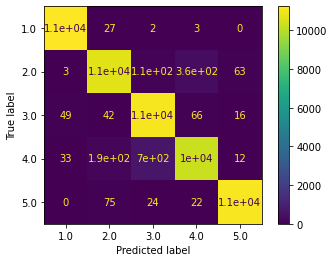

In [19]:
plot_confusion_matrix(svm, x_normZ, y_train);

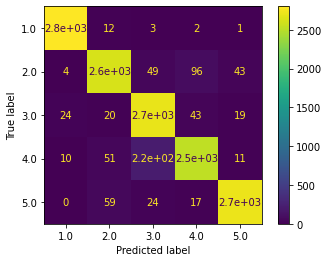

In [20]:
plot_confusion_matrix(svm, x_testZ, y_test);